# Stochastic Simulation

*Winter Semester 2023/24*

02.02.2024

Prof. Sebastian Krumscheid<br>
Asstistant: Stjepan Salatovic

<h3 align="center">
Exercise sheet 10
</h3>

---

<h1 align="center">
Markov Chains
</h1>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from typing import Tuple
from tqdm.notebook import tqdm
from scipy.sparse import lil_matrix, diags
from scipy.sparse.linalg import eigs
from scipy.stats import norm

In [2]:
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

We recall some concepts on the theory of  Markov chains on a discrete state space $\cal X$.

**Irreducibility**

Let $P$ be be a transition matrix on $\cal X$. We say that a state $x_i\in \cal X$ communicates with a state $x_j\in\cal X$ if $\mathbb{P}(X_n=x_j, \text{ for some $n$ }| \ X_0=x_i)>0$; equivalently, if $\exists n\geq 0$ such that $P^{(n)}_{i,j}>0$. A Markov chain is _irreducible_ if every state $x_j$ communicates with every other state $x_i$, i.e., $$ \forall i,j,\ \ \exists n\geq 0 \text{ such that } P^{(n)}_{i,j}>0.$$

**Recurrence**

A state $x_i\in\cal X$ is _recurrent_ if $\mathbb{P}(X_n=x_i \text{ infinitely often })=1$, that is, $x_i$ is visited infinitely-often with probability 1. A Markov chain $\{X_n\}$ is recurrent if every state is recurrent. It is known that every irreducible recurrent Markov chain $\{X_n\}$ on a discrete state space has a (not necessarily finite) invariant distribution  $\pi$ that is unique up to a multiplicative constant. However, if the state space is _finite_, every irreducible Markov chain $\{X_n\}$ is recurrent and has a unique invariant probability distribution.

**Aperiodicity**

The _period_ of a state $x_i$ is the largest integer $d$ satisfying the following property: $P^{(n)}_{i,i}=0$, whenever $n$ is not divisible by $d$. The period of $x_i$ is given by $d(i)$. We say that if $d(i)>1$, then the state $x_i$ is _periodic_. We say that the state $x_i$ is _aperiodic_ otherwise. 
If a Markov chain $\{X_n\}$ is irreducible and has an aperiodic state, then all states are aperiodic, in which case we say that $\{X_n\}$ is aperiodic. In particular, an irreducible Markov chain $\{X_n\}$ is aperiodic if there exists a state $x_j\in \cal X$ such that $P_{jj}>0$. It is known that an irreducible  Markov chain $\{X_n\}$ on a _finite_ state space $\cal X$ converges to $\pi$, i.e., $\pi_j=\lim_{n\to\infty} \mathbb{P}(X_n=x_j),$ $x_j\in \cal X$, if and only if $\{X_n\}$ is aperiodic.

## Exercise 1

A random walk on the integers $I=\{0,1,2\dots\}$ can be constructed in the following way. For $0<p<1/2$, let $Y_0,Y_1,\dots$ be i.i.d random variables with $P(Y_i=1)=p$ and $P(Y_i=-1)=1-p$. Starting with $X_0 = Z_0 = 0$, define two random walks for $n \geq 0$ as
- $X_{n+1}=\max \{ X_n+Y_{n},0  \}$ and
- $Z_{n+1}=|Z_n+Y_n|$.

1. Show that $(X_n)$ and $(Z_n)$ are Markov chains.

This follows from the definition of Markov chain, since $X_{n+1}$ only depends on $X_n$. Thus, $$
	\mathbb{P}(X_{n+1}=x_{n+1}|X_1=x_1,\dots,X_{n}=x_n)=	\mathbb{P}(X_{n+1}=x_{n+1}|X_{n}=x_n).$$

2. Show that an invariant probability measure of the chains  $(X_n)$ and $(Z_n)$ is given by
   \begin{align*}
	&\hat \pi =\left[1, \left(\frac{p}{1-p}\right),\dots, \left(\frac{p}{1-p}\right)^k,\dots \right]a_0, \nonumber \ \ k\geq 0\\
	&\bar \pi = \left[1,\frac{1}{1-p},\frac{p}{(1-p)^2},\dots,\frac{p^{k-1}}{(1-p)^k},\dots\right]b_0,\quad k\geq 1,
	\end{align*}
	respectively. Find $p$, $a_0$, $b_0$ such that the expressions above are probability distributions.

Recall that $\pi$ is an invariant distribution of a Markov chain with transition matrix $P$ if $$\pi P=\pi.$$ Thus, we will verify this for our case. Consider the two Markov transition matrices $P$ and $Q$ given by 
	\begin{align}
	P=\begin{pmatrix}
	1-p&p&0&0&0&\dots\\	
	1-p&0&p&0&0&\ddots\\
	0&1-p&0&p&\ddots&\ddots\\
	0&0&1-p&\ddots&\ddots&\ddots\\
\ddots&\ddots&\ddots&\ddots&\ddots&\ddots\\
	\end{pmatrix}, \ \
	Q=\begin{pmatrix}
	0&1&0&0&0&\dots\\	
	1-p&0&p&0&0&\ddots\\
	0&1-p&0&p&\ddots&\ddots\\
	0&0&1-p&\ddots&\ddots&\ddots\\
	\ddots&\ddots&\ddots&\ddots&\ddots&\ddots\\
	\end{pmatrix}, \nonumber \\
	\end{align}
where $P$ corresponds to the transition matrix of the chain generated by $X_{n+1}=\max\{0,X_n+Y\}$ and $Q$ corresponds to that of $Z_{n+1}=|Z_n+Y|$. We will show that to $P$ and $Q$ there correspond invariant distributions

\begin{align}
&\hat \pi=\left[1, \left(\frac{p}{1-p}\right),\dots, \left(\frac{p}{1-p}\right)^k,\dots \right]a_0, \nonumber \ \ k\geq 0, \nonumber \\
&\bar \pi =\left[1, \frac{1}{1-p},\frac{p}{(1-p)^2},\dots, \frac{p^{k-1}}{(1-p)^{k}},\dots, \right]b_0,\quad k\geq 1.\nonumber 
	\end{align}
respectively. We begin with $P$. For simplicity, denote the $i-$th column of $P$ by $P_i$. Notice that for $P_1$, we have $\hat \pi P_1=[(1-p)+(1-p)p/(1-p)]a_0=a_0=\hat \pi_1.$ Moreover, for the $k-$th column we have 
\begin{align}
&\hat \pi P_{k}=\hat \pi_{k-1}P_{k-1,k}+\hat \pi_{k+1}P_{k+1,k}=p\left(\frac{p}{1-p}\right)^{k-1}a_0+(1-p)\left(\frac{p}{1-p}\right)^{k+1}a_0\nonumber \\
&=\left(p+\frac{p^2}{1-p}\right)\left(\frac{p}{1-p}\right)^{k-1}a_0=\left(\frac{p-p^2+p^2}{1-p}\right)\left(\frac{p}{1-p}\right)^{k-1}a_0=\left(\frac{p}{1-p}\right)^ka_0=\hat \pi_k,
\end{align}
and as such, the chain with transition matrix $P$ is invariant with respect to $\hat \pi$.  

As for $Q$, we have that for $Q_1$, $\bar \pi Q_1=(1-p)/(1-p)b_0=b_0$, for $Q_2$, we have $\bar \pi Q_2=b_0+p/(1-p)b_0=\bar \pi_2$. Moreover, for $Q_k$, $k>2$, we have \begin{align}
&\bar \pi Q_k=\bar \pi_{k-1}p+\bar\pi_{k+1}(1-p)\nonumber \\
&=p\frac{p^{k-2}}{(1-p)^{k-1}}b_0+(1-p)\frac{p^{k}}{(1-p)^{k+1}}b_0\nonumber \\
&=\frac{p^{k-1}}{(1-p)^{k-1}}b_0+\frac{p^{k}}{(1-p)^{k}}b_0\nonumber \\
&=\frac{p^{k-1}}{(1-p)^{k}}b_0=\bar \pi_k\nonumber 
\end{align}
which implies that $\bar \pi$ is an invariant distribution for the Markov chain  with transition matrix $Q$. 

Notice that for both chains to be probability distributions, the sum of the components of $\hat \pi$ and $\bar \pi$ must add to 1. On the case of $\bar \pi$, $a_0$ and $p$ must be chosen such that $$a_0\sum_{k=0}^{\infty}\left(\frac{p}{1-p}\right)^k=1.$$ Notice that the previous sum is finite if $p/(1-p)<1$, which occurs for any $p<1/2$. In turn, it can be shown that (by computing the value of the previous geometric series) in this case, the normalization constant is $$a_0=\frac{1-2p}{1-p}.$$ A similar approach can be applied to $Q$ to obtain \begin{align}
b_0=\frac{1-2p}{2-2p}.
\end{align}

3. Let $p=1/8$. Assess numerically  the convergence of both Markov chains to their 
	invariant distribution by simulating multiple  (independent)
	chains of length $n=100$, each starting in $0$ (i.e. $\lambda = \delta_0$). That is,
	plot the empirical distribution of $X_n,Z_n$ vs $\hat \pi$ and $\bar \pi$, respectively. Repeat your experiments for $m=n+1$. Explain your results.  

In [3]:
def chain_X(n: int, p: float) -> np.array:
    """
    Generates the Markov chain (X_n).

    Args:
        n (int): The length of the sequence to generate.
        p (float): The probability of choosing 1 for Y_n. The probability of choosing -1 is 1-p.

    Returns:
        np.array: The generated chain as a numpy array with length n.
    """
    Y = np.random.choice([1, -1], size=n, p=[p, 1-p])

    X = np.zeros(n)
    for i in range(n - 1):
        X[i + 1] = np.maximum(X[i] + Y[i], 0)

    return X

In [4]:
def chain_Z(n: int, p: float) -> np.array:
    """
    Generates the Markov chain (Z_n).

    Args:
        n (int): The length of the sequence to generate.
        p (float): The probability of choosing 1 for Y_n. The probability of choosing -1 is 1-p.

    Returns:
        np.array: The generated chain as a numpy array with length n.
    """
    Y = np.random.choice([1, -1], size=n, p=[p, 1-p])

    Z = np.zeros(n)
    for i in range(n - 1):
        Z[i + 1] = np.abs(Z[i] + Y[i])

    return Z

In [5]:
def invariant_dist_X(K: int, p: float) -> np.array:
    """
    Computes the invariant distribution for the Markov chain (X_n) characterized by a probability p.

    Args:
        K (int): Truncation of state space, the number of states to include in the result.
        p (float): The probability parameter of the process.

    Returns:
        np.array: Invariant distribution over the first K states, a numpy array of length K.
    """
    a0 = (1 - 2 * p) / (1 - p)
    pi = a0 * (p / (1 - p)) ** np.arange(K)
    return pi

In [6]:
def invariant_dist_Z(K: int, p: float) -> np.array:
    """
    Computes the invariant distribution for the Markov chain (Z_n) characterized by a probability p.

    Args:
        K (int): Truncation of state space, the number of states to include in the result.
        p (float): The probability parameter of the process.

    Returns:
        np.array: Invariant distribution over the first K states, a numpy array of length K.
    """
    b0 = (1 - 2 * p) / (2 - 2 * p)
    pi = b0 * np.hstack((1, p ** np.arange(K - 1) / (1 - p) ** np.arange(1, K)))
    return pi

We repeat our experiments $N=10.000$ times starting at $X_0=Z_0=0$. The Figure above shows the empirical PDF of $X_n$ (left) and $Z_n$ (right) for $n=100$ and $n=101$. As we can see, the chain with transition matrix P converges to its invariant distribution, while the one with transition matrix Q does not. This is due to the chain with transition matrix Q not being aperiodic; notice that if the chain is at state $0$, the chain will move to state 1 with probability 1 and only returns to 0 after an even number of steps.

In [7]:
n = 100
p = 1 / 8

N = 10_000

X_n = np.zeros((N, 2))
Z_n = np.zeros((N, 2))
for i in tqdm(range(N)):
    X_n[i, 0] = chain_X(n, p)[-1]
    Z_n[i, 0] = chain_Z(n, p)[-1]

    X_n[i, 1] = chain_X(n + 1, p)[-1]
    Z_n[i, 1] = chain_Z(n + 1, p)[-1]

K_X = np.max(X_n)
K_Z = np.max(Z_n)

  0%|          | 0/10000 [00:00<?, ?it/s]

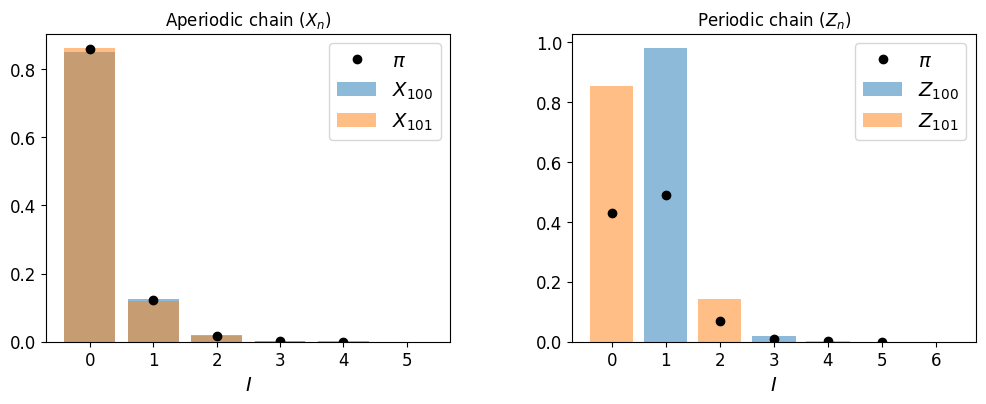

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

vals, counts = np.unique(X_n[:, 0], return_counts=True)
axs[0].bar(vals, counts / N, label="$X_{100}$", alpha=.5)
vals, counts = np.unique(X_n[:, 1], return_counts=True)
axs[0].bar(vals, counts / N, label="$X_{101}$", alpha=.5)

axs[0].plot(np.arange(K_X), invariant_dist_X(K_X, p), "ko", label="$\pi$")
axs[0].set_title("Aperiodic chain $(X_n)$")

vals, counts = np.unique(Z_n[:, 0], return_counts=True)
axs[1].bar(vals, counts / N, label="$Z_{100}$", alpha=.5)
vals, counts = np.unique(Z_n[:, 1], return_counts=True)
axs[1].bar(vals, counts / N, label="$Z_{101}$", alpha=.5)

axs[1].plot(np.arange(K_Z), invariant_dist_Z(K_Z, p), "ko", label="$\pi$")
axs[1].set_title("Periodic chain $(Z_n)$")

for ax in axs.ravel():
    ax.set_xlabel("$I$")
    ax.legend()

4. Discuss the periodicity of both chains. 

## Exercise 2

Consider the random walk $\{X_n\in\mathbb{Z}, n\in\mathbb{N}_0\}$ with
$X_0\sim\lambda$ on the lattice
$\mathcal{X}:= \bigl\{i\colon i\in\mathbb{Z}, \lvert i\rvert \le
2N^2\bigr\}$, whose transition probabilities are given by
\begin{equation*}
\begin{aligned}
\mathbb{P}\bigl(X_{n+1} = i\pm 1\bigl\vert\bigr. X_n = i\bigr) &= \alpha \biggl(1\mp \frac{i}{2N^2}\biggr)\;,\quad \lvert i\rvert \le 2N^2\;,\\
\mathbb{P}\bigl(X_{n+1} = i\bigl\vert\bigr. X_n = i\bigr) &= 1-2\alpha\;,
\end{aligned}
\end{equation*}
for some $\alpha\in (0,\frac{1}{2}]$ and $N\in\mathbb{N}$.

1. Implement an algorithm that simulates the Markov Chain $\{X_n\in\mathbb{Z}, n\in\mathbb{N}_0\}$. Use your implementation to address the following points for different values of $N\ge 1$:
    1. Assess numerically that the Markov chain converges to an
        invariant distribution by simulating multiple (independent)
        chains, each starting in $0$ (i.e. $\lambda = \delta_0$). That is,
        monitor the following quantities (rather, suitable Monte Carlo
        approximations) as functions of the Markov chain length $n$. Speculate on the invariant distribution.

        1. ${\mathbb{E}_\lambda\bigl({X_n}^p\bigr)}^{1/p}$ for $p\in\{1,2,4\}$,
        2. $M_{X_n}(t) := \mathbb{E}_\lambda\bigl(e^{t X_n}\bigr)$ for
            $t\in[-1,1]$.
    2. For $N=10$, compute the eigenvalues and eigenvectors of the transition matrix $P$. Use the obtained results to deduce the invariant distribution $\pi$.

       **Hint:** Use NumPy's [`np.linalg.eig(P)`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html).

   3. Assess the validity of the ergodic theorem. That is, verify that $$\lim_{n\to\infty}\frac{1}{n}\sum_{i=0}^n f(X_n) = \mathbb{E}_\pi(f)\;,\quad \mathbb{P}_\lambda\,\text{–a.s.,}\,$$
		for any $f: {\cal X} \to \mathbb{R}$, with $\sum_n |f(X_n)|\pi_n < \infty$. Specifically,
		investigate this identity for the moments used in Point
		1.A.a and monitor the rate of convergence as a function of $n$.



In [9]:
def lattice_random_walk(n: int, alpha: float, N: int) -> np.array:
    """
    Simulates the random walk (X_n) on a 1D lattice.

    Args:
        n (int): The number of steps in the random walk.
        alpha (float): The parameter controlling the transition probabilities in the random walk.
        N (int): The parameter used to scale the lattice.

    Returns:
        np.array: Positions at each step of the random walk, a numpy array of length n.
    """
    X = np.zeros(n)
    for i in range(n - 1):
        p_plus = alpha * (1 - X[i] / (2 * N ** 2))
        p_minus = alpha * (1 + X[i] / (2 * N ** 2))
        p_same = 1 - 2 * alpha
        X[i + 1] = np.random.choice([X[i] + 1, X[i] - 1, X[i]], p=[p_plus, p_minus, p_same])    
    return X

A. The numerical results shown here are obtained for $\alpha=1/4$, $N=4$, and the expectations are approximated by Monte Carlo
generating $R=10^3$ independent chains.
When inspecting the evolution of the resulting moment
approximations as a function of $n$ in the Figure down below, we
notice an exponential convergence to a stationary state. Moreover,
the transition probabilities of the chain leads us to suspect that
the invariant distribution could be close to a Gaussian. This
suspicion is further strengthened when comparing the approximated
moment generating function at $n=500$ with the moment generating
function of a normal distribution, as is shown in the same Figure.

In [10]:
alpha = 1 / 4
N_runs = 1000
n = 500
N = 4

X = np.zeros((N_runs, n))
for i in tqdm(range(N_runs)):
    X[i] = lattice_random_walk(n, alpha, N)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [11]:
X2 = X ** 2
X4 = X ** 4

t = np.linspace(-1, 1, 10000)
M = np.mean(np.exp(X[:, -1].reshape(-1, 1) * t), axis=0)

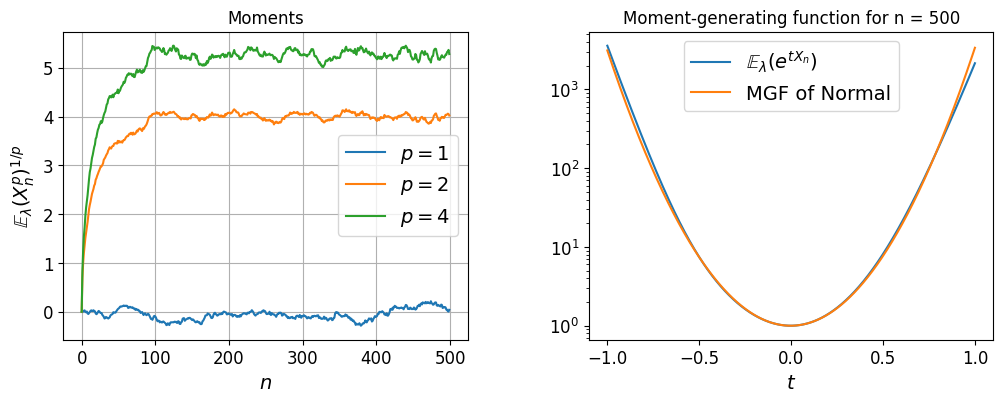

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

axs[0].plot(X.mean(axis=0), label="$p=1$")
axs[0].plot(X2.mean(axis=0) ** (1 / 2), label="$p=2$")
axs[0].plot(X4.mean(axis=0) ** (1 / 4), label="$p=4$")
axs[0].set_ylabel("$\mathbb{E}_\lambda (X_n^p)^{1 / p}$")
axs[0].set_xlabel("$n$")
axs[0].grid()
axs[0].legend()
axs[0].set_title("Moments")

mu = X.mean(axis=0)[-1]
sig = X2.mean(axis=0)[-1] - mu ** 2
axs[1].semilogy(t, M, label="$\mathbb{E}_\lambda (e^{t X_n})$")
axs[1].semilogy(t, np.exp(t * mu + sig / 2 * t ** 2), label="MGF of Normal")
axs[1].set_xlabel("$t$")
axs[1].legend()
axs[1].set_title(f"Moment-generating function for n = {n}");

B. If the Markov chain converges, then we expect exponential
		convergence $e(n) = {|\lambda_2|}^n$, where $\lambda_2$ is the
		eigenvalue with largest absolute value smaller than one. This is
		also visible in the numerical results of the previous
		point. Estimates of this value for $\alpha=1/4$ are shown below:

In [13]:
def build_transition_matrix(alpha: float, N: int) -> np.array:
    """
    Builds the transition matrix for the random walk (X_n) on a 1D lattice.

    Args:
        alpha (float): The parameter controlling the transition probabilities in the random walk.
        N (int): The parameter used to scale the lattice.

    Returns:
        np.array: Transition matrix, a numpy array of shape (4 * N ** 2 + 1) x (4 * N ** 2 + 1).
    """
    states = np.arange(-2 * N**2, 2 * N**2 + 1)

    diag_elements = 1 - 2 * alpha
    off_diag_plus = np.where(np.abs(states) <= 2 * N**2, (1 - states/2/N**2) * alpha, 0)[:-1]
    off_diag_minus = np.where(np.abs(states) <= 2 * N**2, (1 + states/2/N**2) * alpha, 0)[1:]

    P = diags([off_diag_minus, diag_elements, off_diag_plus], [-1, 0, 1])
    return P

In [14]:
Ns = [2, 4, 8, 10, 20]
for N in Ns:
    P = build_transition_matrix(alpha, N)
    lambda2 = np.real(eigs(P)[0][1])
    print(f"N={N:>2}: Convergence rate: C*{lambda2:.5f}^n")

N= 2: Convergence rate: C*0.93750^n
N= 4: Convergence rate: C*0.98438^n
N= 8: Convergence rate: C*0.99609^n
N=10: Convergence rate: C*0.99750^n
N=20: Convergence rate: C*0.99938^n


C. As a consequence of the CLT for Markov chains, we observe the canonical $1/\sqrt{n}$ convergence rate.

In [15]:
n = 10 ** 6

X = lattice_random_walk(n, alpha, N)
X2 = X ** 2
X4 = X ** 4

In [16]:
f1 = np.cumsum(X) / np.arange(1, n + 1)
f2 = np.cumsum(X2) / np.arange(1, n + 1)
f4 = np.cumsum(X4) / np.arange(1, n + 1)

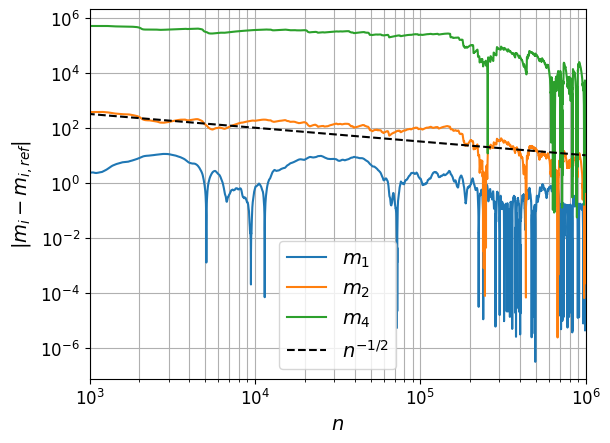

In [17]:
plt.loglog(np.arange(1, n), np.abs(f1[:-1]-f1[-1]), label=r'$m_1$')
plt.loglog(np.arange(1, n), np.abs(f2[:-1]-f2[-1]), label=r'$m_2$')
plt.loglog(np.arange(1, n), np.abs(f4[:-1]-f4[-1]), label=r'$m_4$')
plt.loglog(np.arange(1, n + 1), 10 ** 4 * np.arange(1, n + 1) ** -0.5, "k--", label="$n^{-1/2}$")
plt.grid(which="both")
plt.legend()
plt.xlim(10 ** 3, 10 ** 6)
plt.xlabel("$n$")
plt.ylabel("$|m_i -m_{i, ref}|$");

2. Consider the rescaled Markov chain $Y_n := \frac{1}{N} X_n$ with
state space
$\mathcal{Y}:= \bigl\{x_i\equiv\frac{i}{N}\colon i\in\mathbb{Z},
\lvert i\rvert \le 2N^2\bigr\}$. Show by means of numerical
simulations that the invariant distribution $\nu\equiv \nu_N$ of
$\{Y_n\in\mathbb{Z}, n\in\mathbb{N}_0\}$ is an accurate
approximation to the standard normal measure. Moreover, illustrate
that the approximation quality improves as $N$ increases.

In [18]:
N = 4
alpha = 1 / 4

N_runs = 10000
n = 100

X = np.zeros((N_runs, n))
for i in tqdm(range(N_runs)):
    X[i] = lattice_random_walk(n, alpha, N)

Y = X / N

  0%|          | 0/10000 [00:00<?, ?it/s]

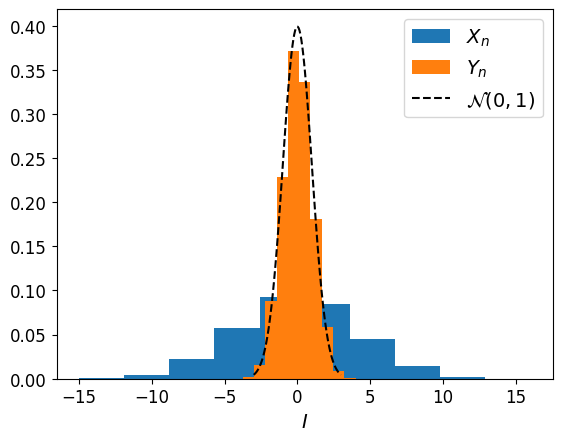

In [19]:
plt.hist(X[:, -1], label="$X_n$", density=True)
plt.hist(Y[:, -1], label="$Y_n$", density=True)

x = np.linspace(-3, 3, 100)
plt.plot(x, norm.pdf(x), "k--", label=r"$\mathcal{N}(0, 1)$")
plt.legend()
plt.xlabel("$I$");

## Exercise 3

Given the transition matrix $$
P=\begin{pmatrix}
0.0 & 0.4 & 0.6 & 0.0 & 0.0 \\
0.65 & 0.0 & 0.35 & 0.0 & 0.0 \\
0.32 & 0.68 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.12 & 0.88 \\
0.0 & 0.0 & 0.0 & 0.56 & 0.44 \\
\end{pmatrix},
$$
and examine whether the corresponding chain is irreducible and aperiodic.

Notice that from the block structure of the matrix $P$, the chain is not irreducible since states $4$ and $5$ do not communicate with states $1,2,3$. Aperiodicity can be checked by definition. 